In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [4]:
data, label_true = load_data('gaussian2d') # iris  'iris')#
pca_painter = PaintPCA(data)

No PCA performed


0.0
figure saved at _simcache/2022-04-11_11-04-51_var_rho0
0.1
figure saved at _simcache/2022-04-11_11-04-52_var_rho10
0.2
Category 2 is too small
figure saved at _simcache/2022-04-11_11-04-52_var_rho20
0.30000000000000004
figure saved at _simcache/2022-04-11_11-04-53_var_rho30
0.4
figure saved at _simcache/2022-04-11_11-04-54_var_rho40
0.5
Category 7 is too small
Category 8 is too small
Category 9 is too small
figure saved at _simcache/2022-04-11_11-04-55_var_rho50
0.6000000000000001
Category 4 is too small
Category 6 is too small
Category 7 is too small
Category 8 is too small
Category 9 is too small
Category 10 is too small
Category 12 is too small
Category 13 is too small
figure saved at _simcache/2022-04-11_11-04-56_var_rho60
0.7000000000000001
Category 6 is too small
Category 8 is too small
Category 13 is too small
Category 14 is too small
Category 15 is too small
Category 16 is too small
Category 17 is too small
Category 18 is too small
Category 19 is too small
Category 20 is to

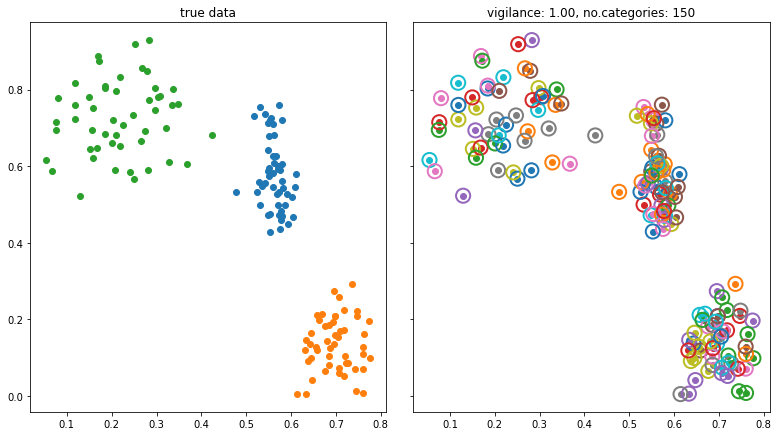

In [5]:
no_rho = 11
ls_rho = np.linspace(0, 1, no_rho)
fig, axs = plt.subplots(1, 2,
                        figsize = (11, 6), sharex=True, sharey=True)
fig.tight_layout()

# plot true data
pca_painter.scatter(axs[0], label_true)
axs[0].set_title("true data")

for rho in ls_rho: #[.5]:# 
    print(rho)
    
    axs[1].clear()
    # init
    net = FuzzyART(alpha=0.5, rho=rho)
    
    # train
    net.train(data, epochs=100) # each epoch, all data is shuffled
    label_pred = net.test(data)[:, 0].astype(int)

    # plot
    # pred
    pca_painter.scatter(axs[1], label_pred, data)
    
    # bipole and centre
    pca_painter.tripole(axs[1], *net.getcat_bipole())
    
    # boundary    
    axs[1].set_prop_cycle(None)
    pca_painter.boundary(axs[1], net.getcat_vertex())
    
    # info
    cat_number = net.w.shape[0]
    axs[1].set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))
    
   
    # save fig
    simname = 'var_rho{:d}'.format(int(rho*100))
    dirname = '_simcache'
    savefigure_datetime(fig, simname, dirname)
    
